# Demo 4 - Feature extraction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load the signal

When loading a signal, it is often useful to plot a portion of it (0.5-1 seconds) to determine processing strategies and thresholds for detection

(200000, 1)


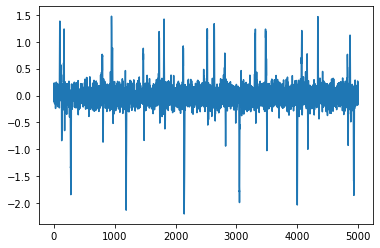

In [16]:
signal = pd.read_csv('../signals/D05_signal.csv').values
print(signal.shape)
plt.figure()
plt.plot(signal[10000:15000])
plt.show()

## Find peaks with a threshold-based strategy

In the same way, it is always useful to plot the spike matrix right after the detection of the peaks, to inspect the quality of the detection

(796, 60)


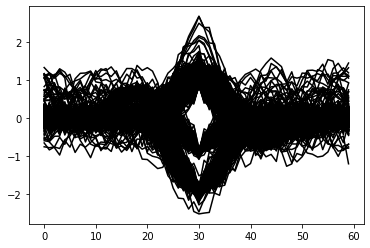

In [19]:
from scipy.signal import find_peaks

pk_locs = find_peaks(np.abs(signal).squeeze(), height=0.3*np.max(np.abs(signal)), distance=60)[0]

spike_matrix = []
for p in pk_locs:
    spike_matrix.append(signal[p-30:p+30])
spike_matrix = np.asarray(spike_matrix).squeeze()

print(spike_matrix.shape)
plt.figure()
plt.plot(spike_matrix.transpose(),'k')
plt.show()

## Define functions for the extraction of the features

It is possible to define a function for each feature that has to be extracted.

<span style='color: red; font-weight: bold'>Note</span>: some feature functions will only be a *wrapper* around the `numpy` methods

In [23]:
def peak2peak(shape_in):
    return np.ptp(shape_in)
def pos_peak(shape_in):
    return(np.max(shape_in))

It can be useful to define a *wrapper* function around the defined methods

In [24]:
def extract_features(shape_in):
    feat_out = []
    feat_out.append(peak2peak(shape_in))
    feat_out.append(pos_peak(shape_in))

    return np.asarray(feat_out)

## Extract features from all the spikes

In [25]:
features_all = []
for p in pk_locs:
    features_all.append(extract_features(signal[p-30:p+30]))
features_all = np.asarray(features_all)
print(features_all.shape)

(796, 2)


## Visualize the spikes in the features space

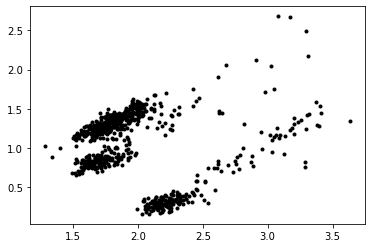

In [27]:
plt.figure()
plt.plot(features_all[:,0],features_all[:,1],'k.')
plt.show()